<img src="https://raw.githubusercontent.com/rhatiro/Curso_EBAC-Profissao_Cientista_de_Dados/main/ebac-course-utils/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Profissão: Cientista de Dados**
### **Módulo 17** | Exercício 2 - Árvores II

Aluna [Lays Félix](https://www.linkedin.com/in/laysfelixbusiness)<br>
Data: 31 de julho de 2024

---

### 1. Carregar as bases

Vamos carregar as bases lidas na tarefa passada. Se você salvou essas bases em arquivo texto, basta fazer a leitura com o comando ```pd.read_csv``` das seguintes bases:

- X_train
- Y_train
- X_test
- Y_test

Não se esqueça de considerar a leitura dos índices dos arquivos no ```read_csv()```!

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay

In [24]:
y_train = pd.read_csv('./output/y_train.csv')
X_train = pd.read_csv('./output/X_train.csv')

y_test = pd.read_csv('./output/y_test.csv')
X_test = pd.read_csv('./output/X_test.csv')

In [25]:
y_train.head()

,0
0,5
1,5
2,5
3,5
4,5


In [26]:
X_train.head()

,1 tBodyAcc-mean()-X,2 tBodyAcc-mean()-Y,3 tBodyAcc-mean()-Z,4 tBodyAcc-std()-X,5 tBodyAcc-std()-Y,6 tBodyAcc-std()-Z,7 tBodyAcc-mad()-X,8 tBodyAcc-mad()-Y,9 tBodyAcc-mad()-Z,10 tBodyAcc-max()-X,...,552 fBodyBodyGyroJerkMag-meanFreq(),553 fBodyBodyGyroJerkMag-skewness(),554 fBodyBodyGyroJerkMag-kurtosis(),"555 angle(tBodyAccMean,gravity)","556 angle(tBodyAccJerkMean),gravityMean)","557 angle(tBodyGyroMean,gravityMean)","558 angle(tBodyGyroJerkMean,gravityMean)","559 angle(X,gravityMean)","560 angle(Y,gravityMean)","561 angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [27]:
y_test.head()

,0
0,5
1,5
2,5
3,5
4,5


In [28]:
X_test.head()

,1 tBodyAcc-mean()-X,2 tBodyAcc-mean()-Y,3 tBodyAcc-mean()-Z,4 tBodyAcc-std()-X,5 tBodyAcc-std()-Y,6 tBodyAcc-std()-Z,7 tBodyAcc-mad()-X,8 tBodyAcc-mad()-Y,9 tBodyAcc-mad()-Z,10 tBodyAcc-max()-X,...,552 fBodyBodyGyroJerkMag-meanFreq(),553 fBodyBodyGyroJerkMag-skewness(),554 fBodyBodyGyroJerkMag-kurtosis(),"555 angle(tBodyAccMean,gravity)","556 angle(tBodyAccJerkMean),gravityMean)","557 angle(tBodyGyroMean,gravityMean)","558 angle(tBodyGyroJerkMean,gravityMean)","559 angle(X,gravityMean)","560 angle(Y,gravityMean)","561 angle(Z,gravityMean)"
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,0.071645,-0.330370,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.401189,-0.121845,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,0.062891,-0.190422,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,0.116695,-0.344418,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.121711,-0.534685,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857


### 2. Divisão da base em Treino, Validação e Teste

A base já se encontra dividida em Treino e Validação. O que vamos fazer então é extrair uma base de Validação da base de Treino.

Extraia 25% da base de treino como base de validação.

In [29]:
X = X_test
y = y_test

X_, X_test, y_, y_test = train_test_split(X, y, test_size=.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_, y_, train_size=.25, random_state=42)

### 3. Melhores 3 variáveis

Rode uma árvore com profundidade máxima igual a 4 para prever a atividade humana com todas as variáveis.
Observe a importância das variáveis e considere as 3 variáveis com maior importância para os próximos passos.
Dica: utilize o atributo ```clf.feature_importances_``` da árvore treinada.

In [30]:
clf = DecisionTreeClassifier(max_depth=4)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
importances = clf.feature_importances_
print('Importância das variáveis:', importances)

Importância das variáveis: [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.12373681
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.13200649 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.       

In [31]:
importancia_das_variaveis = pd.Series(clf.feature_importances_, index=X_train.columns)
importancia_das_variaveis.sort_values(ascending=False, inplace=True)
importancia_das_variaveis.head(3)

559 angle(X,gravityMean)     0.280466
345 fBodyAccJerk-mean()-X    0.250424
505 fBodyAccMag-mad()        0.142485
dtype: float64

### 4. Construa uma árvore com as 3 melhores variáveis

Utilizando as três variáveis encontradas acima, construa uma árvore de decisão. Encontre o melhor ```ccp_alpha``` utilizando a base de validação, conforme a estrutura que vimos em aula.

In [32]:
%%time
X_train_cut = X_train[['559 angle(X,gravityMean)', '345 fBodyAccJerk-mean()-X', '505 fBodyAccMag-mad()']]
X_valid_cut = X_valid[['559 angle(X,gravityMean)', '345 fBodyAccJerk-mean()-X', '505 fBodyAccMag-mad()']]
X_test_cut = X_test[['559 angle(X,gravityMean)', '345 fBodyAccJerk-mean()-X', '505 fBodyAccMag-mad()']]

CPU times: total: 0 ns
Wall time: 745 ms


In [33]:
caminho = DecisionTreeClassifier(random_state=2360873).cost_complexity_pruning_path(X_valid_cut, y_valid)
ccp_alphas, impurities = caminho.ccp_alphas, caminho.impurities
ccp_alphas

array([0.        , 0.00037707, 0.00037707, 0.00042421, 0.00042421,
       0.00042421, 0.00045249, 0.00045249, 0.00045249, 0.00045249,
       0.0004658 , 0.00048481, 0.00048481, 0.00049491, 0.00050277,
       0.00050277, 0.00050277, 0.00050938, 0.00051419, 0.00051848,
       0.00051848, 0.00051848, 0.00051935, 0.0005221 , 0.00052521,
       0.00052521, 0.0005279 , 0.00053234, 0.00053584, 0.00054676,
       0.00054847, 0.00054898, 0.00055111, 0.00055147, 0.00055276,
       0.00055776, 0.00056561, 0.00056561, 0.00056561, 0.00056561,
       0.00057504, 0.00058581, 0.00061086, 0.00062689, 0.00062958,
       0.00065045, 0.00065359, 0.000675  , 0.00067873, 0.00070297,
       0.00070701, 0.00073529, 0.00073529, 0.00075415, 0.00075415,
       0.00077105, 0.00081118, 0.00081312, 0.00084842, 0.00084842,
       0.00084842, 0.00085543, 0.00086032, 0.00086727, 0.00087017,
       0.00088673, 0.00089057, 0.00089503, 0.00092   , 0.00094268,
       0.00094268, 0.00095261, 0.00096962, 0.00098039, 0.00098

In [34]:
%%time
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=2360873, ccp_alpha=ccp_alpha).fit(X_valid_cut, y_valid)
    clfs.append(clf)

CPU times: total: 1.3 s
Wall time: 3.87 s


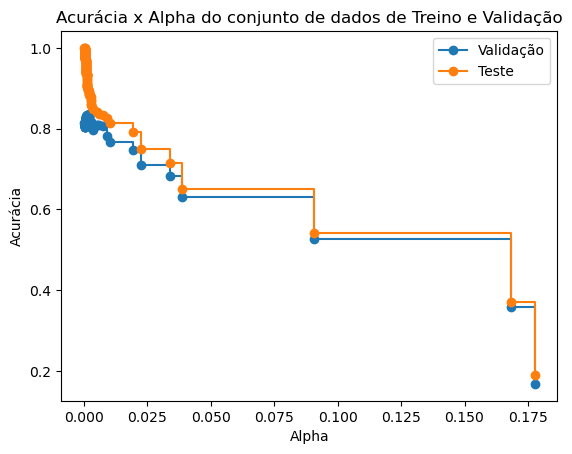

CPU times: total: 766 ms
Wall time: 2.13 s


In [35]:
%%time
train_scores = [clf.score(X_train_cut, y_train) for clf in clfs]
valid_scores = [clf.score(X_valid_cut, y_valid) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("Alpha")
ax.set_ylabel("Acurácia")
ax.set_title("Acurácia x Alpha do conjunto de dados de Treino e Validação")
ax.plot(ccp_alphas, train_scores, marker='o', label="Validação",
        drawstyle="steps-post")
ax.plot(ccp_alphas, valid_scores, marker='o', label="Teste",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [36]:
%%time
ind_melhor_arvore = len(valid_scores) - valid_scores[::-1].index(max(valid_scores)) - 1
melhor_arvore = clfs[ind_melhor_arvore]

print(f'Acurácia da melhor árvore na base de validação: {valid_scores[ind_melhor_arvore]*100:.2f}')

melhor_arvore

Acurácia da melhor árvore na base de validação: 100.00
CPU times: total: 0 ns
Wall time: 0 ns


DecisionTreeClassifier(random_state=2360873)

### 5. Avaliação do modelo

Avalie a árvore encontrada no item anterior na base de testes.

Acurácia: 82.03


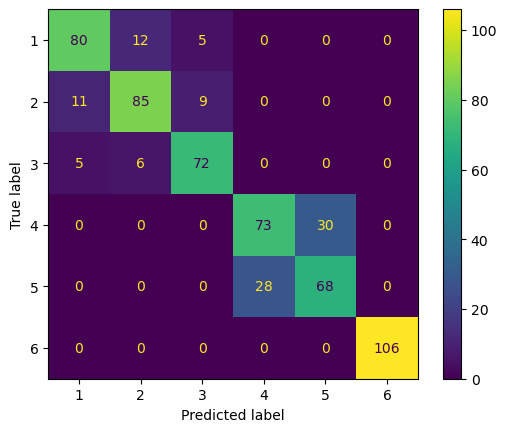

In [37]:
acuracia_teste = melhor_arvore.score(X_test_cut, y_test)

print(f'Acurácia: {acuracia_teste*100:.2f}')
ConfusionMatrixDisplay.from_estimator(melhor_arvore, X_test_cut, y_test);

Acurácia: 81.49


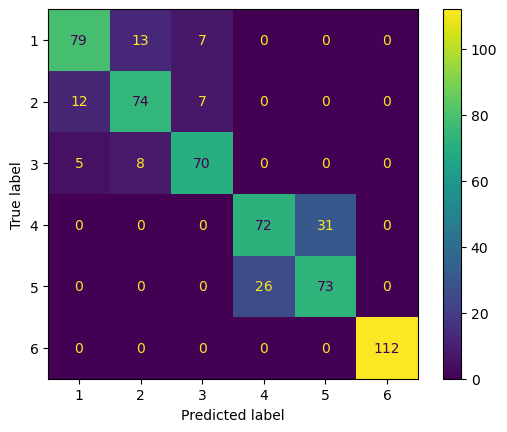

In [38]:
# Avaliei a árvore encontrada no item anterior na base de treino também

acuracia_teste = melhor_arvore.score(X_train_cut, y_train)

print(f'Acurácia: {acuracia_teste*100:.2f}')
ConfusionMatrixDisplay.from_estimator(melhor_arvore, X_train_cut, y_train);